In [2]:
library('igraph')
library('Matrix')
library('pracma')

In [3]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

### Part 2. Random Walk on Networks

#### 1. Random walk on Erdös-Rényi networks

**a. Create an undirected random network with 1000 nodes and p = 0.01**

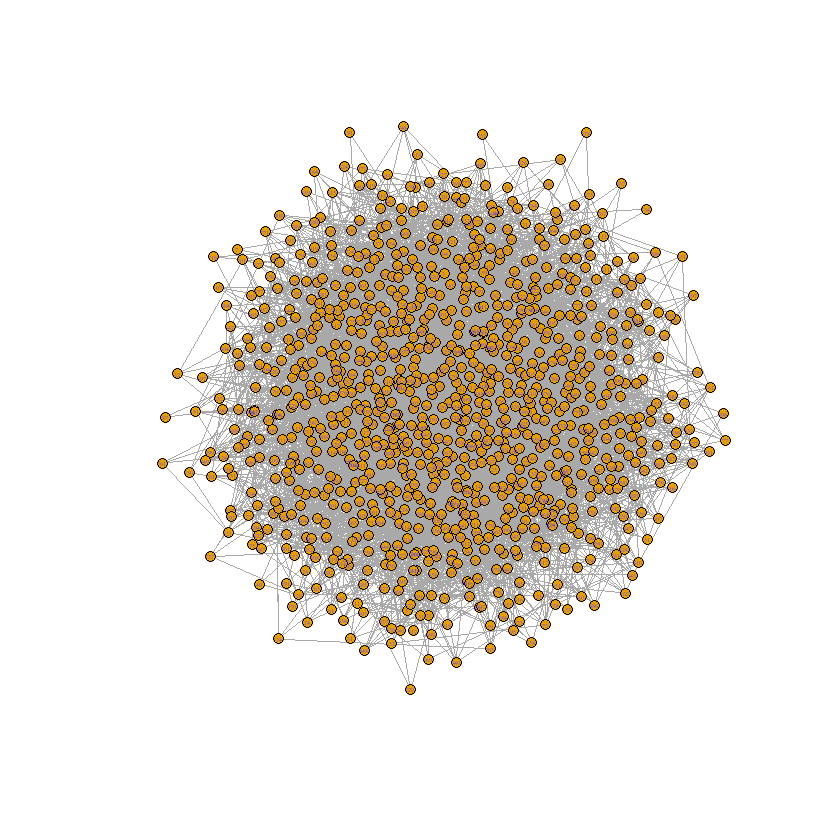

In [4]:
set.seed(1)
g1 <- erdos.renyi.game(1000, p = 0.01, directed=F)
plot(g1,vertex.size=4, vertex.label.cex=0.3)

**b. **

In [5]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [6]:
RowVar <- function(x) {
  rowSums((x - rowMeans(x))^2)/(dim(x)[2] - 1)
}

In [7]:
set.seed(1)
tm <- create_transition_matrix(g1)
g1_vcount = vcount(g1)

s_t_matrix <- c()
last_deg <- c()
for (init_node in sample(1:g1_vcount, 300)){
    trial_s = c()
    last = init_node
    for (t in 1:300){
        PMF = tm[last, ]
        last = sample(1:g1_vcount, 1, prob = PMF)  
        shortestpath = shortest.paths(g1, init_node, last)
        trial_s = c(trial_s, shortestpath)
    }
    last_deg <- c(last_deg, degree(g1, last))
    s_t_matrix <- cbind(s_t_matrix, trial_s)
}
s_t <- rowMeans(s_t_matrix)
var_t <- RowVar(s_t_matrix)

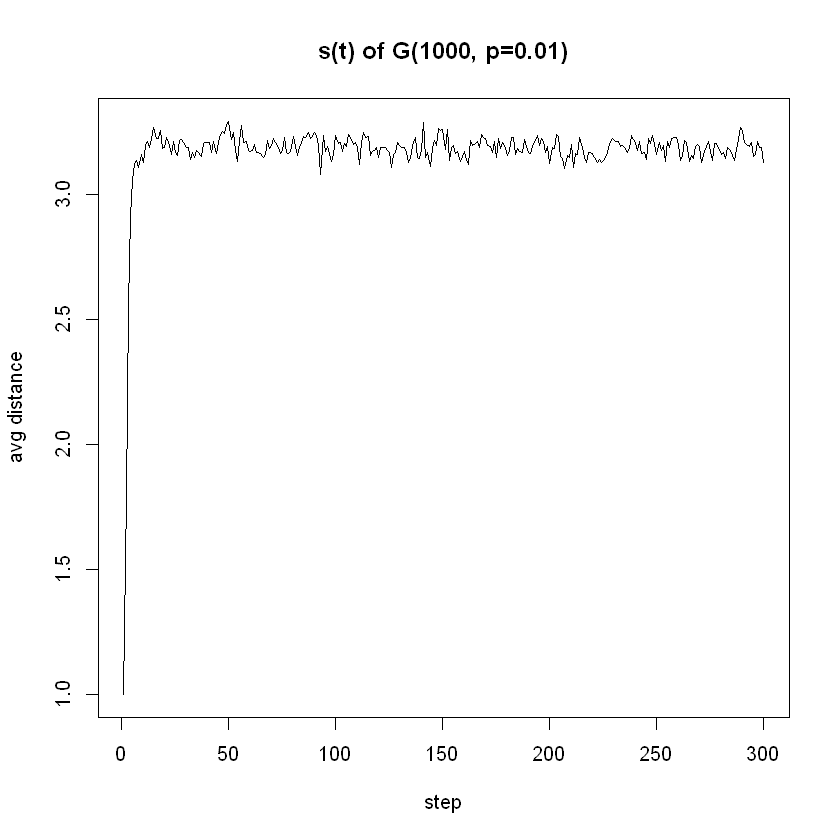

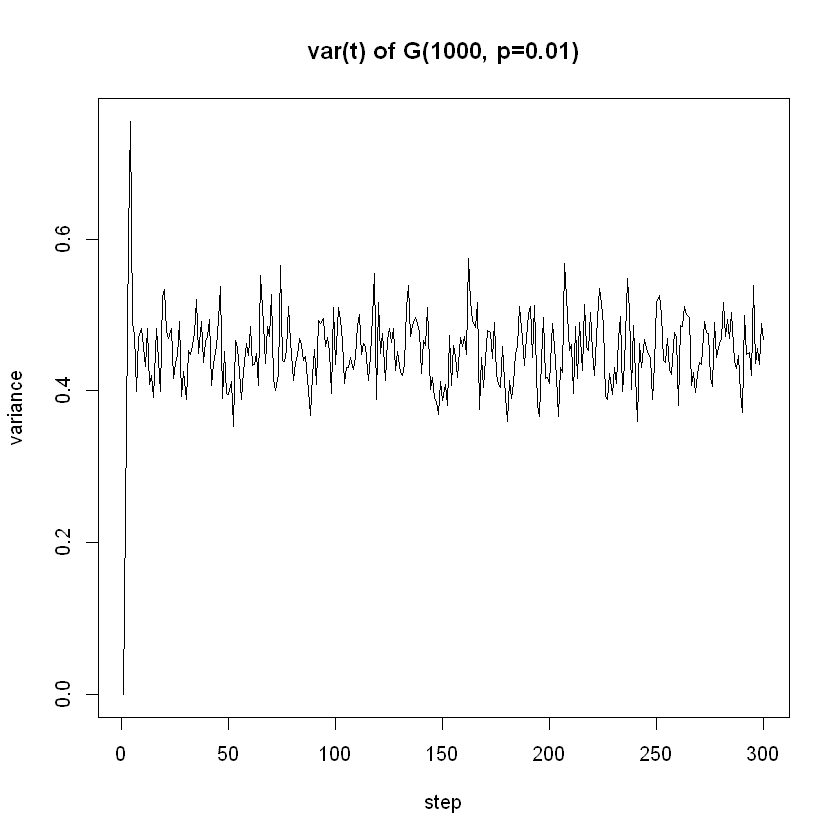

In [8]:
plot(s_t, main="s(t) of G(1000, p=0.01)",xlab="step",ylab="avg distance",type="l")
plot(var_t, main="var(t) of G(1000, p=0.01)",xlab="step",ylab="variance",type="l")

In [140]:
print(s_t[1:40])

 [1] 1.000000 1.793333 2.556667 2.913333 3.056667 3.120000 3.136667 3.106667
 [9] 3.160000 3.126667 3.196667 3.213333 3.190000 3.220000 3.270000 3.223333
[17] 3.223333 3.256667 3.183333 3.186667 3.230000 3.213333 3.160000 3.213333
[25] 3.170000 3.156667 3.216667 3.220000 3.206667 3.190000 3.186667 3.140000
[33] 3.166667 3.150000 3.176667 3.170000 3.153333 3.203333 3.206667 3.206667


**c.**

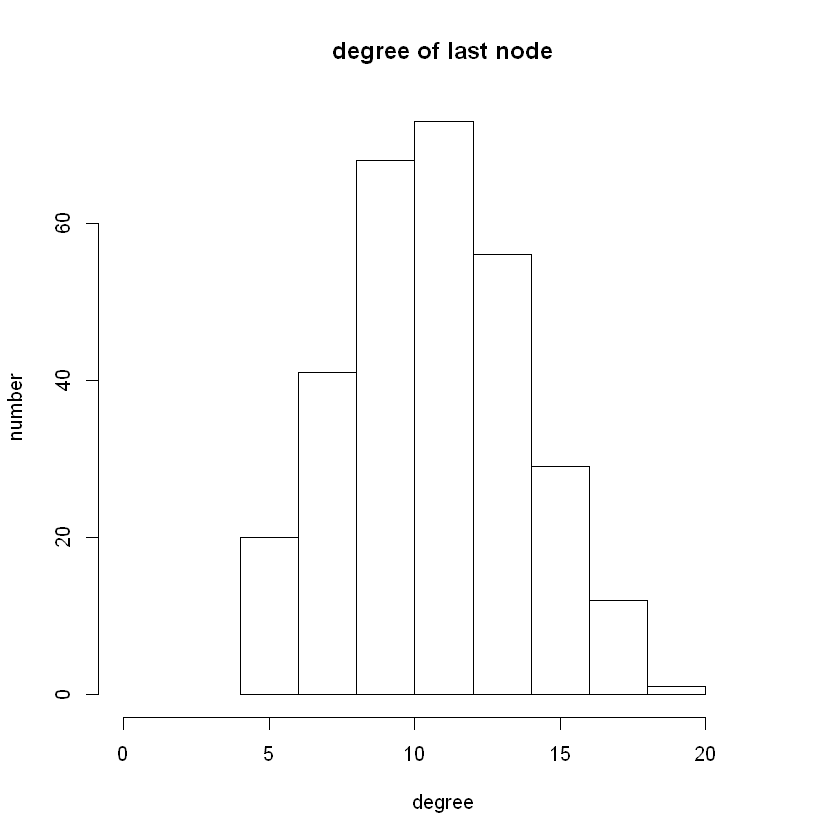

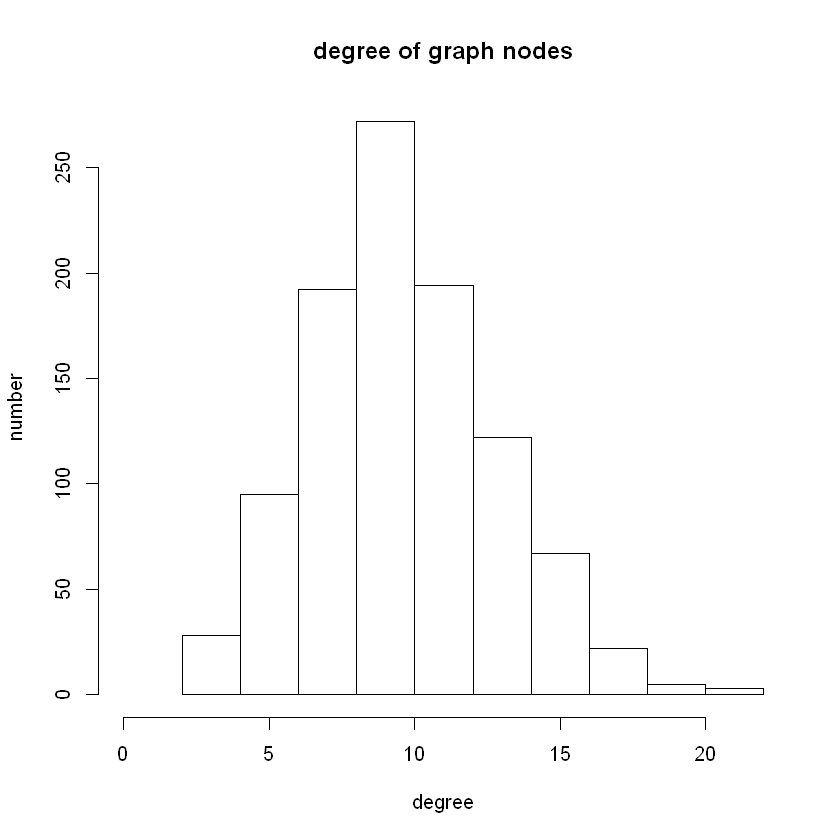

In [6]:
hist(last_deg, main="degree of last node",xlab="degree",ylab="number",xlim=c(0,22))
hist(degree(g1), main="degree of graph nodes",xlab="degree",ylab="number",xlim=c(0,22))

**d.**

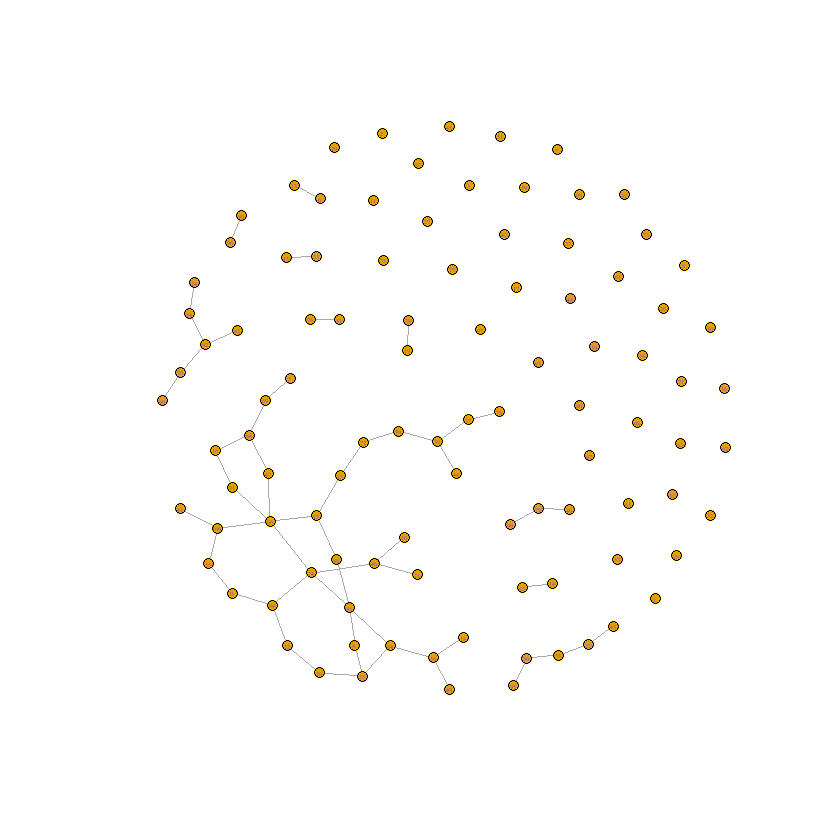

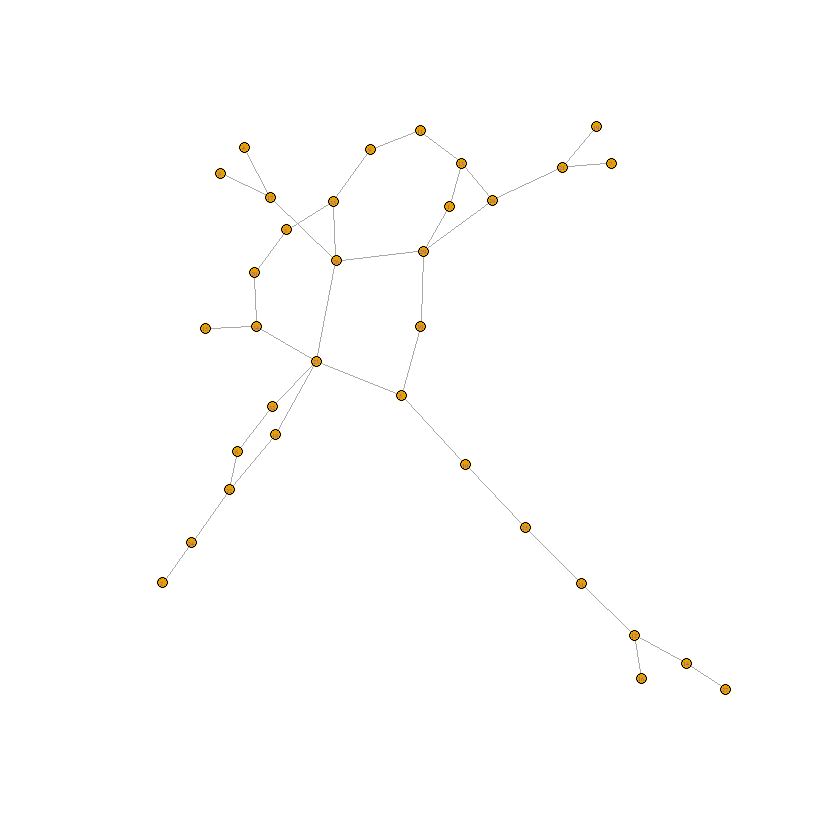

In [7]:
set.seed(1)
g2 <- erdos.renyi.game(100, p = 0.01, directed=F)
plot(g2,vertex.size=4, vertex.label.cex=0.3)

tmp.components <- clusters(g2)
gcc_s <- which.max(tmp.components$csize)
gcc <- induced.subgraph(g2, which(tmp.components$membership == gcc_s))

plot(gcc,vertex.size=4, vertex.label.cex=0.3)

tm2 <- create_transition_matrix(gcc)
g2_vcount = vcount(gcc)

s_t_matrix <- c()
for (init_node in sample(1:g2_vcount, size=100, replace=TRUE)){
    trial_s = c()
    last = init_node
    for (t in 1:300){
        PMF = tm2[last, ]
        last = sample(1:g2_vcount, 1, prob = PMF)  
        shortestpath = shortest.paths(gcc, init_node, last)
        trial_s = c(trial_s, shortestpath)
    }
    s_t_matrix <- cbind(s_t_matrix, trial_s)
}
s_t2 <- rowMeans(s_t_matrix)
var_t2 <- RowVar(s_t_matrix)

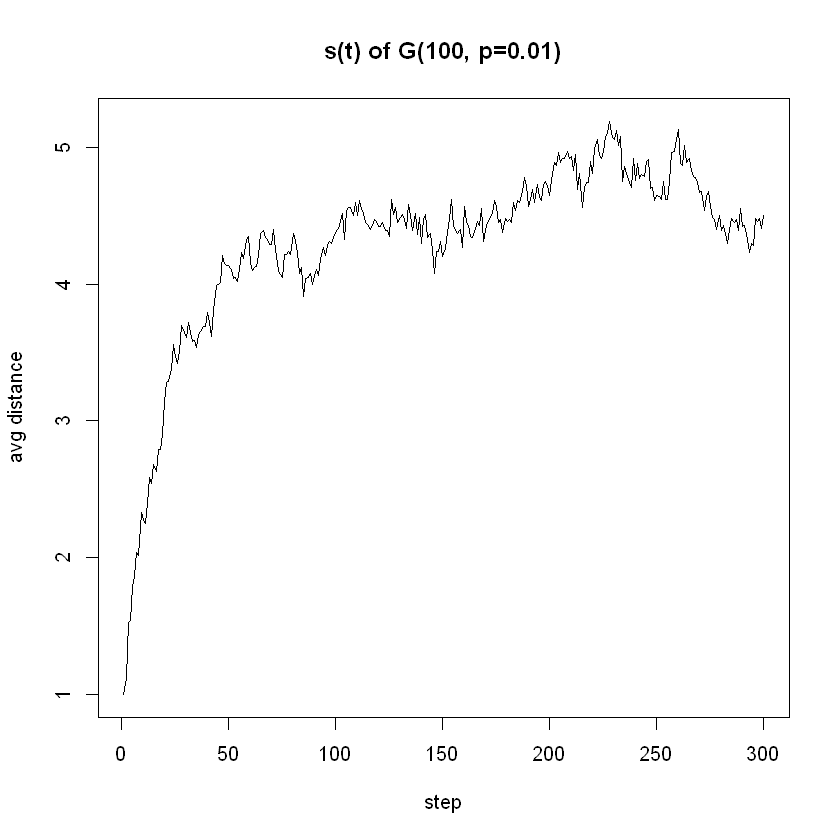

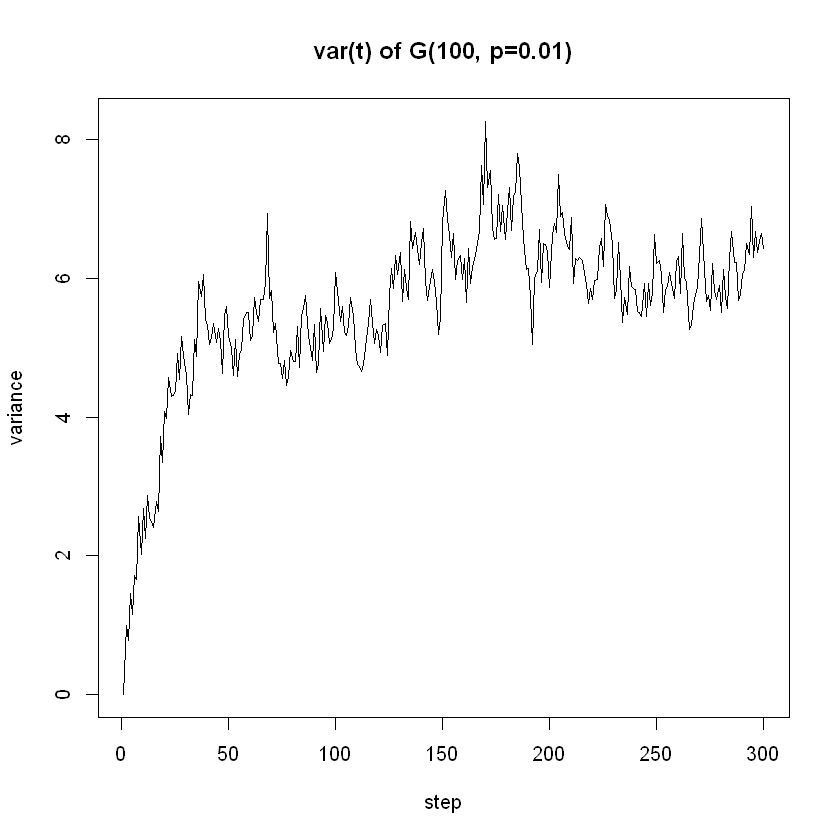

In [8]:
plot(s_t2, main="s(t) of G(100, p=0.01)",xlab="step",ylab="avg distance",type="l")
plot(var_t2, main="var(t) of G(100, p=0.01)",xlab="step",ylab="variance",type="l")

In [58]:
shortest_path_matrix = function (g){

    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    d = diameter(g)
    sp = adj
    tmp = adj>0
    for (i in 2:d){
        tmp = (adj %*% tmp) > 0
        sp[!(sp > 0) & tmp] = sp[!(sp > 0) & tmp] + i
    }
    sp[diag(rep(1, n)==1)] = 0
    return(sp)
}

In [149]:
if(!file.exists("./g3.RData")){
    set.seed(1)
    g3 <- erdos.renyi.game(10000, p = 0.01, directed=F)
    # plot(g3,vertex.size=4, vertex.label.cex=0.3)
    # sp3 <- shortest_path_matrix(g3)
    sp3 <- shortest.paths(g3)
    g3_vcount = vcount(g3)

    set.seed(1)
    s_t_matrix <- c()
    for (init_node in sample(1:g3_vcount, 100)){
        trial_s = c()

        last = init_node
        for (t in 1:300){
            neigh = neighbors(g3, last)
            last = sample(as_ids(neigh), 1)
            shortestpath = sp3[init_node, last]
            trial_s = c(trial_s, shortestpath)
        }
        s_t_matrix <- cbind(s_t_matrix, trial_s)
    }
    save(s_t_matrix, file = "./g3.RData")
} else {
    load(file = "./g3.RData")
}

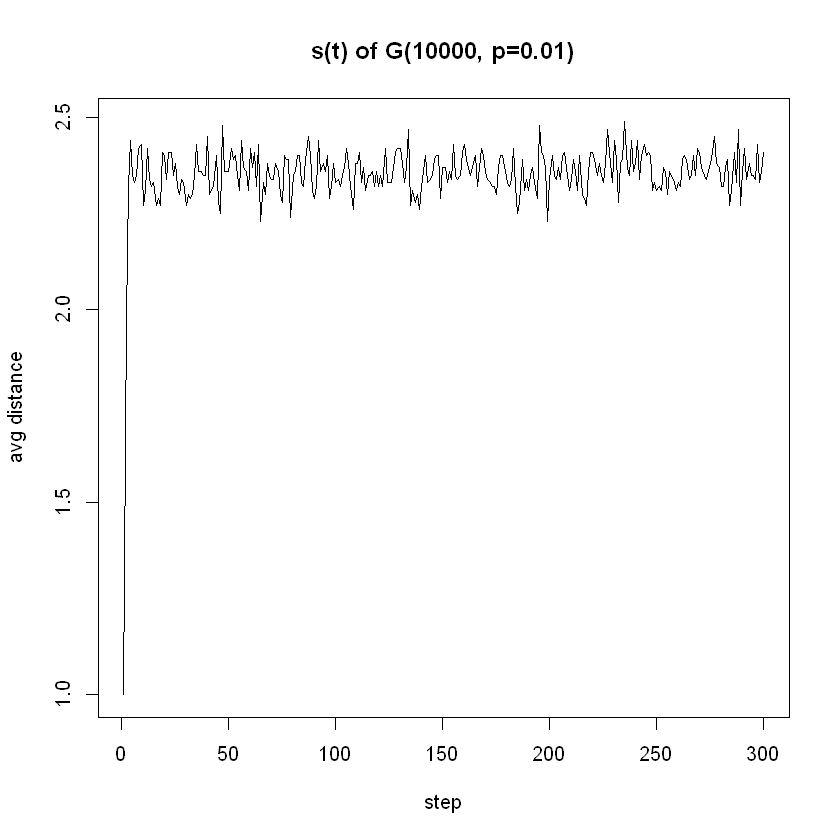

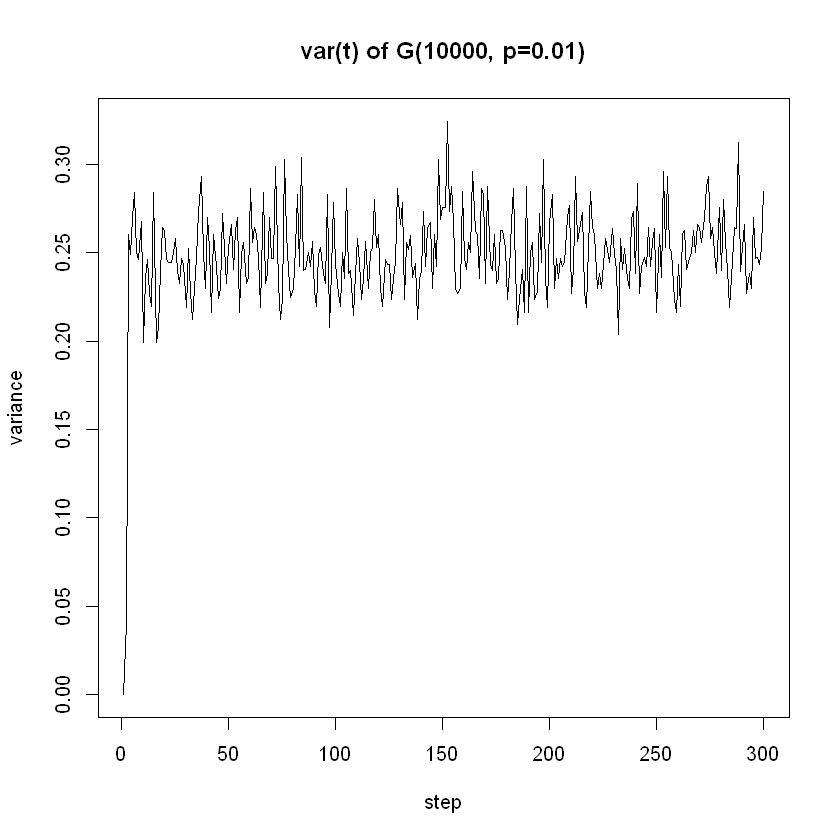

In [150]:
s_t3 <- rowMeans(s_t_matrix)
var_t3 <- RowVar(s_t_matrix)
plot(s_t3, main="s(t) of G(10000, p=0.01)",xlab="step",ylab="avg distance",type="l")
plot(var_t3, main="var(t) of G(10000, p=0.01)",xlab="step",ylab="variance",type="l")

In [133]:
print(s_t3[1:10])

 [1] 2.37 2.41 2.37 2.35 2.31 2.44 2.33 2.42 2.30 2.37


In [4]:
load("./g1000.RData")

#### 2. Random walk on networks with fat-tailed degree distribution

**a.**

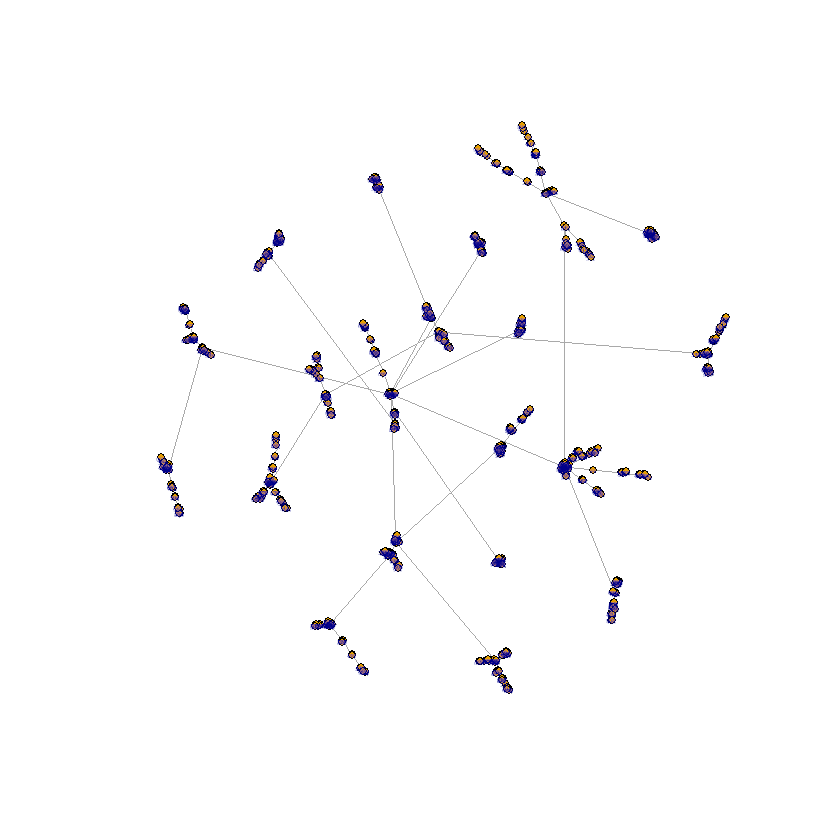

In [113]:
g4 <- barabasi.game(1000, m=1, directed=F)
plot(g4,vertex.size=3, vertex.label.cex=0.3)

**b.**

In [9]:
set.seed(1)
tm4 <- create_transition_matrix(g4)
g4_vcount = vcount(g4)

s_t_matrix <- c()
last_deg2 <- c()
for (init_node in sample(1:g4_vcount, 100, replace=TRUE)){
    trial_s = c()
    last = init_node
    for (t in 1:300){
        PMF = tm4[last, ]
        last = sample(1:g4_vcount, 1, prob = PMF)  
        shortestpath = shortest.paths(g4, init_node, last)
        trial_s = c(trial_s, shortestpath)
    }
    last_deg2 <- c(last_deg2, degree(g4, last))
    s_t_matrix <- cbind(s_t_matrix, trial_s)
}

s_t4 <- rowMeans(s_t_matrix)
var_t4 <- RowVar(s_t_matrix)
plot(s_t4, main="s(t) of PA(1000, m=1)",xlab="step",ylab="avg distance",type="l")
plot(var_t4, main="var(t) of PA(1000, m=1)",xlab="step",ylab="variance",type="l")

ERROR: Error in "igraph" %in% class(graph): 找不到对象'g4'


**c.**

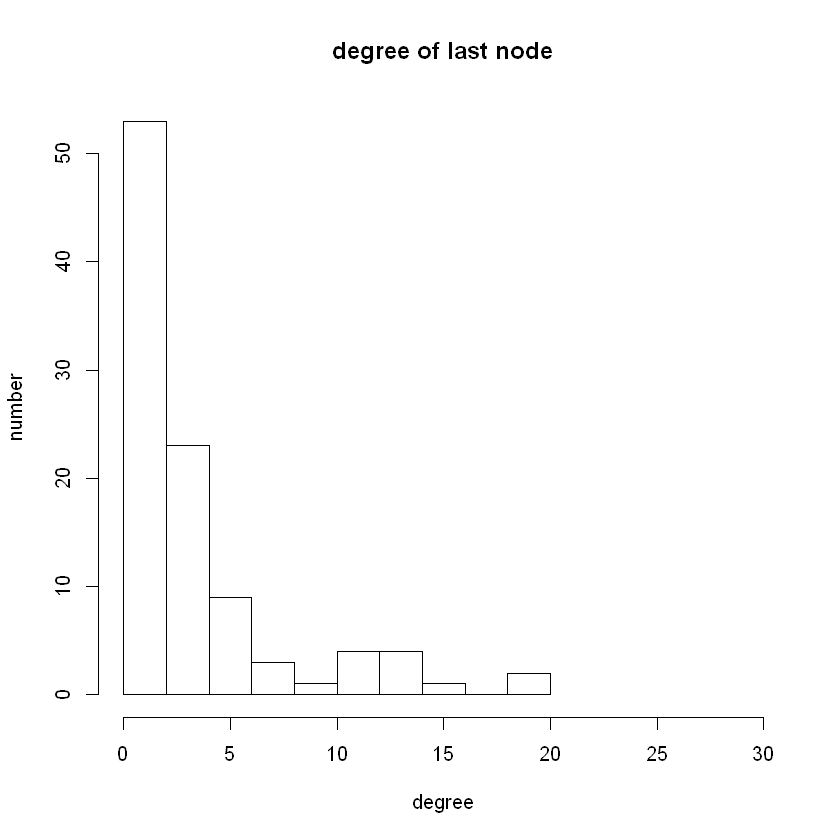

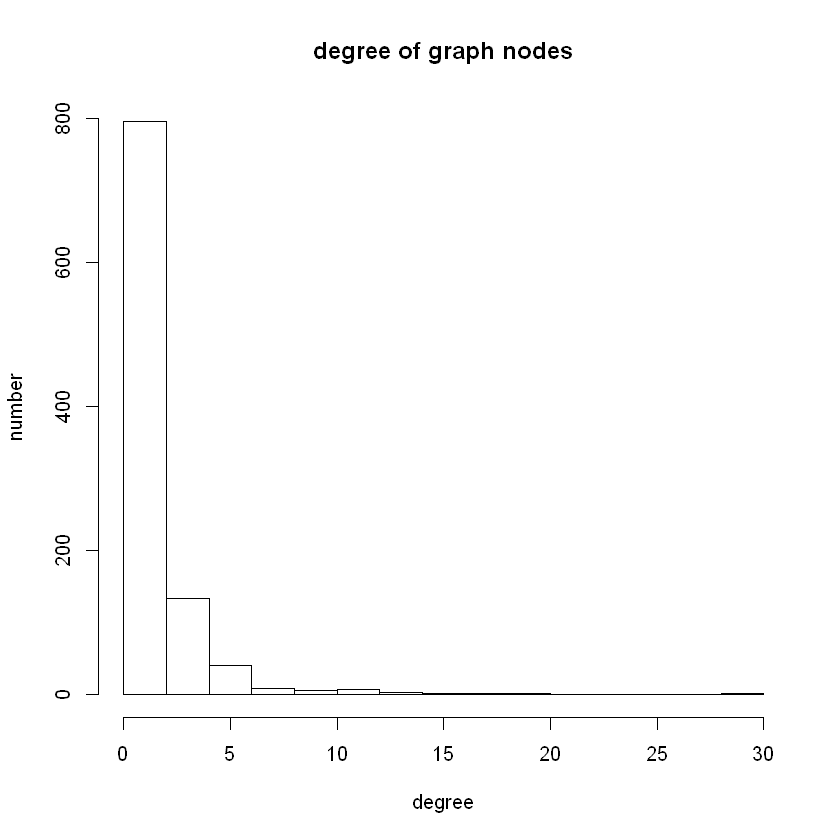

In [130]:
hist(last_deg2, main="degree of last node",xlab="degree",ylab="number",xlim=c(0,30))
hist(degree(g4), main="degree of graph nodes",xlab="degree",ylab="number")

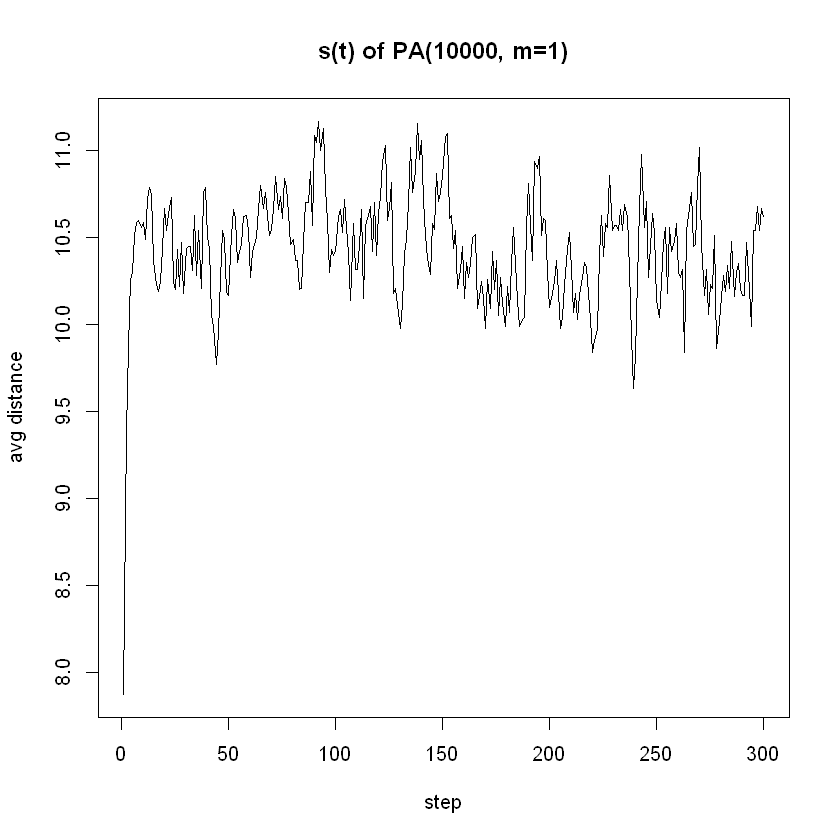

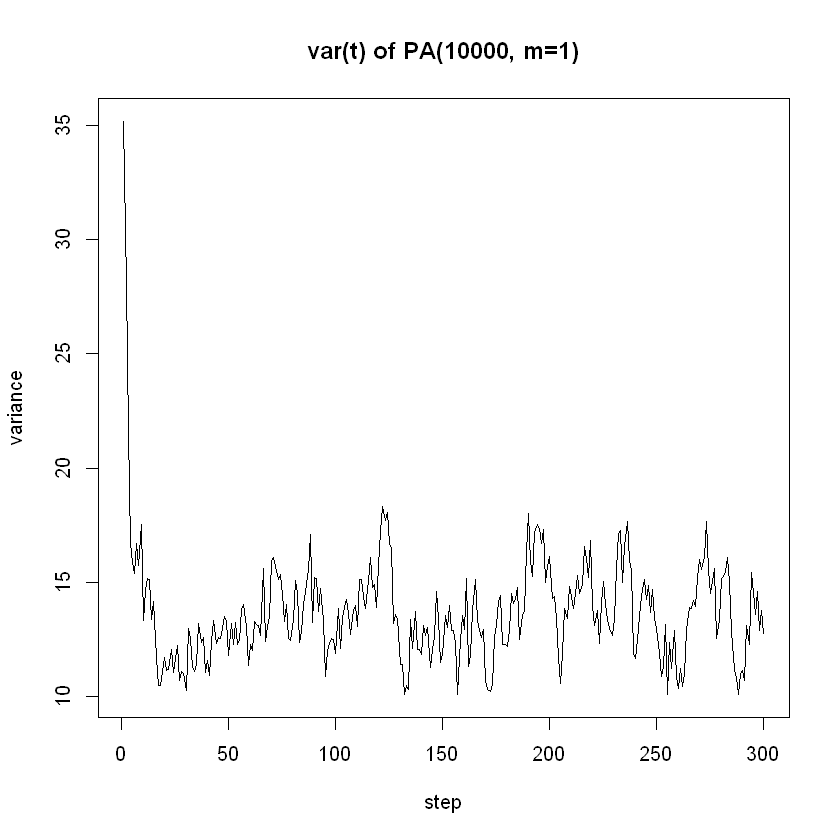

In [5]:
if(!file.exists("./g6.RData")){
    set.seed(1)
    g6 <- barabasi.game(10000, m = 1, directed=F)
    # plot(g6,vertex.size=4, vertex.label.cex=0.3)
    sp6 <- shortest.paths(g6)
    g6_vcount = vcount(g6)

    set.seed(1)
    s_t_matrix <- c()
    for (init_node in sample(1:g6_vcount, 100)){
        trial_s = c()

        last = init_node
        for (t in 1:300){
            neigh = neighbors(g6, last)
            last = sample(as_ids(neigh), 1)
            shortestpath = sp6[init_node, last]
            trial_s = c(trial_s, shortestpath)
        }
        s_t_matrix <- cbind(s_t_matrix, trial_s)
    }
    save(s_t_matrix, file = "./g6.RData")
} else {
    load(file = "./g6.RData")
}
s_t6 <- rowMeans(s_t_matrix)
var_t6 <- RowVar(s_t_matrix)
plot(s_t6, main="s(t) of PA(10000, m=1)",xlab="step",ylab="avg distance",type="l")
plot(var_t6, main="var(t) of PA(10000, m=1)",xlab="step",ylab="variance",type="l")

In [134]:
print(s_t6[1:10])

 [1] 10.37  9.15  8.21  7.27  7.08  6.89  6.98  6.92  6.94  6.90
